SENTIMENT ANALYSIS OF TWEETS
Introduction
Sentiment analysis of tweets task will use tweets sent to six airlines and attempt to identify whether they are positive, negative or neutral. This is a natural language processing and a classification task.

Sentiment analysis process will try two methods and select one with the most accuracy.

About the dataset
The tweets dataset comprises of 13 features including:

airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
name
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone
Import libraries and preview dataset

In [1]:
!pip install langdetect
!pip install textatistic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=61625932650e20ab44f734e1d693fde3001b47314b69b9d25b86c30859c6d5c9
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29047 sha256=38b8773f3e61b753db19267b7dff280c48ad64102377a75302997a10746c1951
  Stored in directory: /root/.cache/pip/wheels/6e/31/c3/df8af4aa9ec3f671b0e8bc3bfa642c75918f2479ca4050f5f4
  Created wheel for pyhyphen: filename=PyHyphen-4.0.3-cp37-abi3-linux_x86_64.whl size=64706 sha256=8cf5676fdb7b0d5cd26190bd619fa57d68126517fe318e2ee1335

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/JoanCarles/iCloudDrive/Documents/_Universitats/_Bachelors/Salle/data-science/Moduls/Module 5/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd

# Read dataset
tweets_df = pd.read_csv('Airline-Sentiment-2-w-AA.csv', index_col='tweet_id')

# Display the first few rows of the DataFrame
tweets_df.head()


,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,,,,,,,
5.703060e+17,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada)
5.703010e+17,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
5.703010e+17,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada)
5.703010e+17,3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
5.703010e+17,4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [5]:
# View dataset features
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 14640 entries, 5.70306e+17 to 5.69587e+17
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         14640 non-null  int64  
 1   _unit_id                      14640 non-null  int64  
 2   _golden                       14640 non-null  bool   
 3   _unit_state                   14640 non-null  object 
 4   _trusted_judgments            14640 non-null  int64  
 5   _last_judgment_at             14584 non-null  object 
 6   airline_sentiment             14640 non-null  object 
 7   airline_sentiment:confidence  14640 non-null  float64
 8   negativereason                9178 non-null   object 
 9   negativereason:confidence     10522 non-null  float64
 10  airline                       14640 non-null  object 
 11  airline_sentiment_gold        40 non-null     object 
 12  name                          14640 non-nu

Descriptive Analysis¶
Duration of tweets
The tweets were sent between 16th Feb 2015 to 24th Feb 2015

In [6]:
# Extracting features that we will use
tweets_df = tweets_df[['text','tweet_created','airline_sentiment']]
tweets_df

,text,tweet_created,airline_sentiment
tweet_id,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2/24/15 11:35,neutral
5.703010e+17,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,positive
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,neutral
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,negative
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,negative
...,...,...,...
5.695880e+17,@AmericanAir thank you we got on a different f...,2/22/15 12:01,positive
5.695870e+17,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,negative
5.695870e+17,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,neutral


In [7]:
tweets_df['tweet_created'] = pd.to_datetime(tweets_df.tweet_created, format = '%m/%d/%y %H:%M')
tweets_df.tweet_created.agg(['min','max'])

min   2015-02-16 23:36:00
max   2015-02-24 11:53:00
Name: tweet_created, dtype: datetime64[ns]

Polarity of the tweets
The tweets have been pre-classified into different emotions. Among the tweets, 62% are categorized as negative, indicating a predominantly negative sentiment, while 16% are classified as positive, suggesting a smaller proportion of positive sentiments. Additionally, 21% of the tweets are categorized as neutral, representing a neutral emotional tone. These pre-assigned emotion categories will serve as the feature against which we will evaluate the accuracy of our predictions.

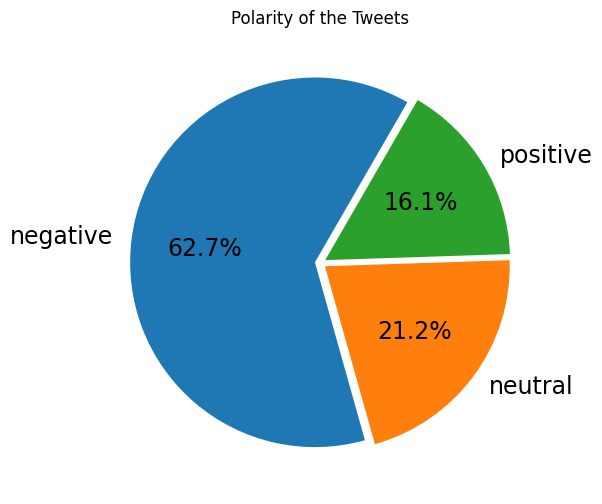

In [8]:
import matplotlib.pyplot as plt
# Plotting the pie chart
fig = plt.figure(figsize=(10,6))
tweets_df.airline_sentiment.value_counts().plot(kind='pie', label='', autopct='%1.1f%%', explode=[0.03,0.03,0.03], textprops={'fontsize':17, 'color':'k'}, startangle=60)
plt.title('Polarity of the Tweets')
plt.show()


Preprocessing

Feature extraction
Creating new features for:

*   Number of hashtag
*   Number of mentions
*   Number of characters
*   Number of words

Number of hashtags in the tweet


In [9]:
import re
# Define the regular expression pattern for hashtags
pattern = r'#[a-zA-Z0-9]+'

# Apply the lambda function to count the number of hashtags in each text
hashtags = tweets_df.text.apply(lambda x: len(re.findall(pattern, x)))

# Add the 'hashtags' column to the 'tweets_df' DataFrame
tweets_df = tweets_df.assign(hashtags=hashtags.values)

# Display the first 5 rows
tweets_df.head(5)


,text,tweet_created,airline_sentiment,hashtags
tweet_id,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0


Number of mentions in the tweet

In [10]:
# Define the regular expression pattern for mentions
pattern = r'@[a-zA-Z0-9]+'

# Apply the lambda function to count the number of mentions in each text
mentions = tweets_df.text.apply(lambda x: len(re.findall(pattern, x)))

# Add the 'mentions' column to the 'X' DataFrame
tweets_df = tweets_df.assign(mentions=mentions.values)

tweets_df.head(5)

,text,tweet_created,airline_sentiment,hashtags,mentions
tweet_id,,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0,2
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0,1
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0,1
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0,1
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0,1


Number of characters in the tweet

In [11]:
# Apply the lambda function to count the number of characters in each text
no_of_chars = tweets_df.text.apply(lambda x: len(x))

# Add the 'no_of_chars' column to the 'X' DataFrame
tweets_df = tweets_df.assign(no_of_chars=no_of_chars)

tweets_df.head()

,text,tweet_created,airline_sentiment,hashtags,mentions,no_of_chars
tweet_id,,,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0,2,35
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0,1,72
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0,1,71
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0,1,126
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0,1,55


Number of words in the tweet

In [12]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Tokenize the text in each tweet to generate a list of tokens
tokens = [word_tokenize(tweet) for tweet in tweets_df.text]

# Count the number of alphanumeric tokens in each tokenized tweet
words = [len([token for token in sent if token.isalnum()]) for sent in tokens]

# Add the 'no_of_words' column to the 'tweets_df' DataFrame
tweets_df = tweets_df.assign(no_of_words=words)

# Display the first few rows
tweets_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,tweet_created,airline_sentiment,hashtags,mentions,no_of_chars,no_of_words
tweet_id,,,,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0,2,35,4
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0,1,72,9
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0,1,71,12
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0,1,126,17
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0,1,55,10


Extracting the airline name¶
We have tweets to six major airlines.

In [13]:
# Identify text starting with the @ sign
pattern = r'@[a-zA-Z0-9]+'
tweets_df['airline_extracted'] = tweets_df.text.apply(lambda x: re.findall(pattern, x))

# Extract the name of the airline
tweets_df['airline_extracted'] = [item[0].lower() for item in tweets_df.airline_extracted]

# Remove the '@' sign from the name
tweets_df['airline_extracted'] = tweets_df['airline_extracted'].apply(lambda x: re.sub("@", '',str(x)))

tweets_df['airline_extracted'].value_counts()

united             3817
usairways          2905
americanair        2754
southwestair       2417
jetblue            2215
virginamerica       504
deltaassist           2
nrhodes85             2
ods1819               1
chasefoster           1
sb5551                1
albertbreer           1
djevolutionhd         1
andrewfallis          1
sarahpompei           1
timbennettg3          1
malhoit               1
scm1133               1
ninadavuluri          1
shannonwoodward       1
nytimes               1
eatgregeat            1
catfoodbeerglue       1
hillaconlin           1
internjohnradio       1
kciairport            1
imaginedragons        1
dadboner              1
melissaafrancis       1
mandarinjourney       1
lindaswc              1
vanessaannz           1
Name: airline_extracted, dtype: int64

Cleaning airlines¶
We will remove tweets not addressed to the six airlines.

In [14]:
# Get the list of unique airlines in the 'airline' column of the 'X' DataFrame
not_airline = tweets_df['airline_extracted'].value_counts().index.tolist()

# Iterate over a list of specific airlines to remove them from the 'not_airline' list
for airline in ['united', 'usairways', 'americanair', 'southwestair', 'jetblue', 'virginamerica']:
    not_airline.remove(airline)


In [15]:
import numpy as np
# Print the number of rows before the operation
print('Number of rows before =', tweets_df.shape[0])

# Set the 'airline_extracted' values to NaN for rows where 'airline_extracted' is in the 'not_airline' list
tweets_df.loc[tweets_df['airline_extracted'].isin(not_airline), 'airline_extracted'] = np.nan

# Drop rows with missing values in the 'airline_extracted' column
tweets_df.dropna(subset=['airline_extracted'], inplace=True)

# Print the number of rows after the operation
print('Number of rows after =', tweets_df.shape[0])


Number of rows before = 14640
Number of rows after = 14612


Tokenization/lemmatization
Tokenization and lemmatization are two key concepts in natural language processing (NLP) and text analysis.

Tokenization:

Definition: Tokenization is the process of breaking down text into smaller units, called tokens. These tokens can be words, numbers, or punctuation marks. In essence, it involves splitting sentences and phrases into individual words or meaningful elements.
Purpose: The main purpose of tokenization is to simplify the text data for analysis. By breaking text into smaller parts, algorithms can more easily process and analyze the data. For example, in sentiment analysis, tokenization allows a machine learning model to work with individual words to determine the sentiment.
Example: Consider the sentence "Tokenization is essential." Tokenization would break this down into the tokens "Tokenization", "is", and "essential".
Lemmatization:

Definition: Lemmatization is a process in NLP where words are reduced to their base or root form. Unlike stemming, which crudely chops off the ends of words, lemmatization considers the context and converts the word to its meaningful base form, known as the lemma.
Purpose: The goal is to reduce the inflectional forms of each word into a common base or root. It helps in standardizing words to their base form, which is essential for many text processing applications where the meaning of words is important, such as text classification, information retrieval, and natural language understanding.
Example: For verbs, "am", "are", and "is" would all be lemmatized into "be". For nouns, "mice" would be lemmatized to "mouse".

In summary, while tokenization is about breaking text into smaller units for analysis, lemmatization is about reducing words to their base or dictionary form. Both are crucial preprocessing steps in many NLP tasks.

In [16]:
!pip install spacy
!python -m spacy download en_core_web_lg
import spacy

nlp = spacy.load('en_core_web_lg')


2024-01-15 09:36:49.560512: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 09:36:49.560589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 09:36:49.563824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 09:36:49.579737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 09:36:51.037724: W tensorflow/compiler/tf2

In [17]:
# Define the function for tokenization and lemmatization
def spacy_token(text):
    # Process the text using Spacy
    doc = nlp(text)
    # Extract the lemmatized tokens
    tokens = [token.lemma_ for token in doc]
    # Return the list of lemmatized tokens
    return tokens

In [18]:
# Apply the spacy_token function to the tweets column
text_tokens = tweets_df.text.apply(spacy_token)
text_tokens

tweet_id
5.703060e+17            [@VirginAmerica, what, @dhepburn, say, .]
5.703010e+17    [@VirginAmerica, plus, you, 've, add, commerci...
5.703010e+17    [@virginamerica, I, do, not, today, ..., must,...
5.703010e+17    [@VirginAmerica, it, be, really, aggressive, t...
5.703010e+17    [@VirginAmerica, and, it, be, a, really, big, ...
                                      ...                        
5.695880e+17    [@americanair, thank, you, we, get, on, a, dif...
5.695870e+17    [@americanair, leave, over, 20, minute, Late, ...
5.695870e+17    [@americanair, please, bring, American, Airlin...
5.695870e+17    [@americanair, you, have, my, money, ,, you, c...
5.695870e+17    [@americanair, we, have, 8, ppl, so, we, need,...
Name: text, Length: 14612, dtype: object

Removing punctuations¶

In [19]:
# Iterate over each row in the text_tokens DataFrame
for i in range(len(text_tokens)):
    # Remove punctuation from each token in the current row
    text_no_punct = [token for token in text_tokens.iloc[i] if token.isalnum()]
    # Update the current row in the text_tokens DataFrame with the modified tokens
    text_tokens.iloc[i] = text_no_punct

text_tokens

tweet_id
5.703060e+17                                          [what, say]
5.703010e+17    [plus, you, add, commercial, to, the, experien...
5.703010e+17    [I, do, not, today, must, mean, I, need, to, t...
5.703010e+17    [it, be, really, aggressive, to, blast, obnoxi...
5.703010e+17    [and, it, be, a, really, big, bad, thing, abou...
                                      ...                        
5.695880e+17    [thank, you, we, get, on, a, different, flight...
5.695870e+17    [leave, over, 20, minute, Late, Flight, no, wa...
5.695870e+17    [please, bring, American, Airlines, to, blackb...
5.695870e+17    [you, have, my, money, you, change, my, flight...
5.695870e+17    [we, have, 8, ppl, so, we, need, 2, know, how,...
Name: text, Length: 14612, dtype: object

Removing stopwords

In [20]:
# Load stop words from spacy module
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [21]:
# Iterate over each row in the text_tokens Series
for i in range(len(text_tokens)):
    # Convert each token to lowercase and remove stopwords
    tokens = [token.lower() for token in text_tokens.iloc[i] if token.lower() not in stopwords]
    # Join the processed tokens back into a string
    tokens_joined = " ".join(tokens)
    # Update the current row in the text_tokens DataFrame with the joined tokens
    text_tokens.iloc[i] = tokens_joined

In [24]:
tweets_df.text = text_tokens
tweets_df

,text,tweet_created,airline_sentiment,hashtags,mentions,no_of_chars,no_of_words,airline_extracted
tweet_id,,,,,,,,
5.703060e+17,,2015-02-24 11:35:00,neutral,0,2,35,4,virginamerica
5.703010e+17,plus add commercial experience tacky,2015-02-24 11:15:00,positive,0,1,72,9,virginamerica
5.703010e+17,today mean need trip,2015-02-24 11:15:00,neutral,0,1,71,12,virginamerica
5.703010e+17,aggressive blast obnoxious entertainment guest...,2015-02-24 11:15:00,negative,0,1,126,17,virginamerica
5.703010e+17,big bad thing,2015-02-24 11:14:00,negative,0,1,55,10,virginamerica
...,...,...,...,...,...,...,...,...
5.695880e+17,thank different flight chicago,2015-02-22 12:01:00,positive,0,1,63,11,americanair
5.695870e+17,leave 20 minute late flight warning communicat...,2015-02-22 11:59:00,negative,0,1,150,23,americanair
5.695870e+17,bring american airlines blackberry10,2015-02-22 11:59:00,neutral,1,1,60,7,americanair


Exploratory Data Analysis
Word cloud
To generate our wordcloud, we will join all the texts from the tweets. We will update our stopwords to include obvious words common in airports like flight, fly, plane, airport, airline e.t.c.

The word cloud generated has words such as "Thank," "time," "help," "delay," and "cancel" appearing often, which reveals the prevalent themes and sentiments in these tweets. The prominence of "Thank" suggests a high frequency of gratitude and appreciation expressed towards the airlines. The word "time" indicates a focus on flight schedules and punctuality. "Help" indicates a recurring theme of seeking assistance or support. The larger size of "delay" and "cancel" signifies that flight disruptions are commonly discussed.

In [25]:
text = ''
for i in range(len(text_tokens)):
    text = text + " " + text_tokens.iloc[i]

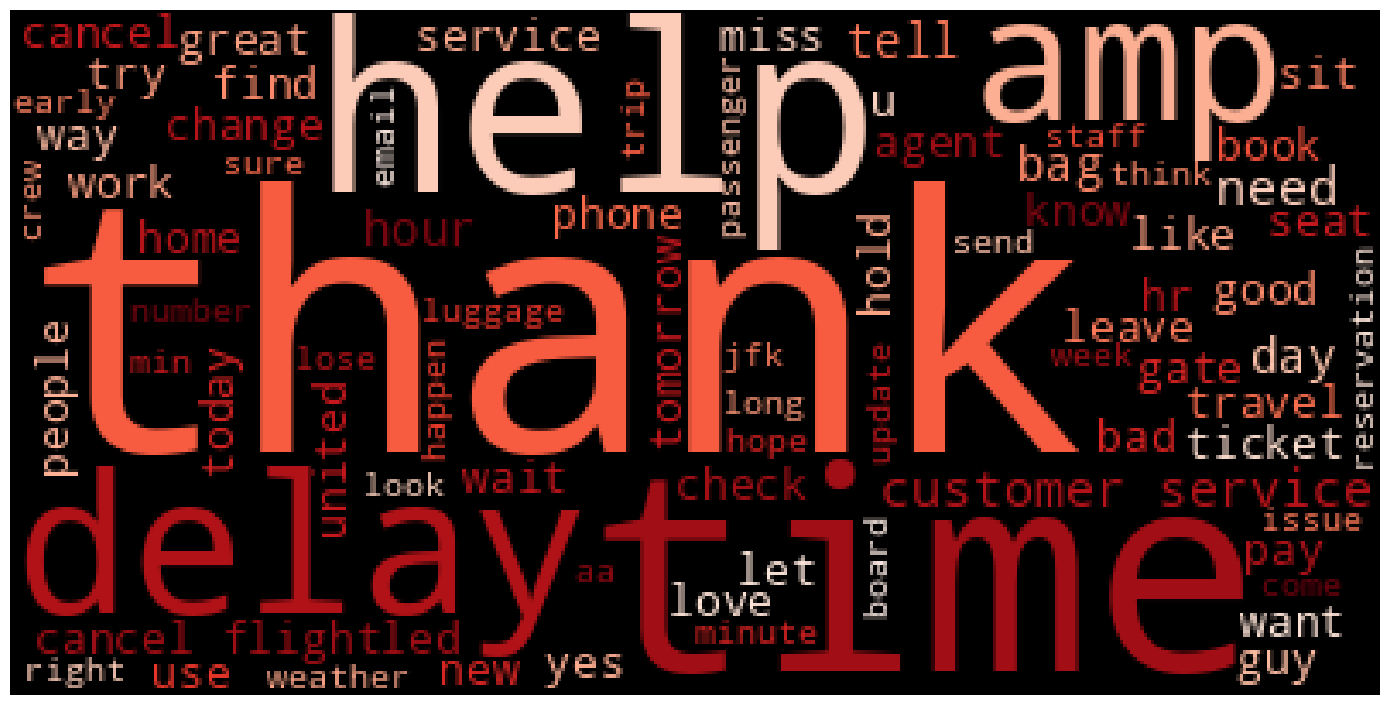

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig = plt.figure(figsize=(14, 10))
cloud = WordCloud(background_color='black', colormap='Reds', min_font_size=7, stopwords=['flight', 'fly', 'plane', 'airport', 'airline', 'flightle']).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout()
plt.show()



Visualizing sample tweets¶
We will visualize sample tweets with the words thank, time, delay, cancel, help, customer and service

Thank, Time, Delay, Cancel, Help
A sample of 5 tweets with the words has tweets that sound positive and appreciative for thank, or complaining for time. delay, cancel, help and customer service

In [29]:
import random

sample = []
for tweet in tweets_df.text.values:
    if 'thank' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['forget reservation thank great leadership company cancel flight flight thank',
 'thank',
 'thank good rebooke agent phone amp addtl resolution dm appreciated',
 'thank fill claim hope bag tomorrow',
 'thank flight leave 2 arrive airport early wedding vt grateful fly btv']

In [30]:
sample = []
for tweet in tweets_df.text.values:
    if 'time' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['departure time late flightr lucky home 3',
 'think 2 week waiting time contact lose customer',
 'wait line time tell crewmember update 3hrdelay disappoint',
 'grade trip flight timeliness cancel flightations customer service flight attendant',
 'ok 4th try today 138 minute hold time terrible']

In [31]:
sample = []
for tweet in tweets_df.text.values:
    if 'delay' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['reason delay',
 'listen delay message phone delay message come shit',
 'compensate delay cancel flightlation',
 '3 cancel flightlations delay cause miss connect flight night home thank pathetic',
 'flight plan delay tuesday computer crash']

In [33]:
sample = []
for tweet in tweets_df.text.values:
    if 'cancel' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['accord dca recover nicely yesterday snow cancel flightling flight',
 'good talk agent reschedule cancel flighted flight answer aa know busy need help thank',
 'cancel flight flight',
 'miami phl flight cancel flightled gate aa phone awful awful awful',
 'thank help reflight booking problem cancel flightedflight yvonne anthony help tel aviv time happyfriday']

In [32]:
sample = []
for tweet in tweets_df.text.values:
    if 'help' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['change entire flight plan vacation day night early stay help',
 '3 day late flightr bag leave iad united help tell different story',
 'group cancel flightlation fee waive ticket book rep help',
 'help hold 3 hrs amp client want ff nbr record elite waa',
 'try change flight online error help dm']

In [34]:
sample = []
for tweet in tweets_df.text.values:
    if 'customer service' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['translation reinvest mammoth profit customer service experience care',
 'upset select seat tuesday flight online phone terrible customer service help',
 'rudeness poor customer service job requirement wait 28hrs',
 'overflight booking problem plane departing delay return quick fix amp break attitudy customer service worstairline',
 'formally complain customer service handler misconnecte deny boarding amp lose bag help']

Airlines
The bar chart shows the count of tweets directed to different airlines. United Airlines received the highest number of tweets with 3,817, suggesting a significant level of engagement and interaction on Twitter. US Airways and American Airlines followed closely with 2,905 and 2,754 tweets respectively. Southwest Airlines and JetBlue received 2,417 and 2,215 tweets respectively. tweets_df America had the lowest number of tweets with 504, suggesting relatively fewer mentions or interactions compared to other airlines.

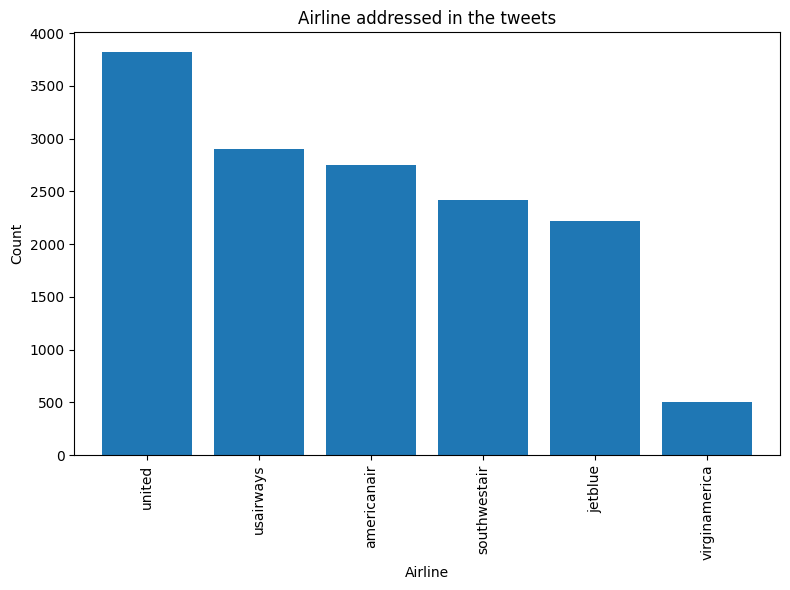

In [35]:
# Create a new figure with a specific size
fig = plt.figure(figsize=(8, 6))

# Generate a bar plot of the airline counts
tweets_df.airline_extracted.value_counts().plot(kind='bar', width=0.8)

# Set the plot labels
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline addressed in the tweets')

# Adjust the layout of the plot to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


Sentiment Analysis using lexicon method¶

In [36]:
!pip install textblob
from textblob import TextBlob

def lexicon_sentiment(df):
    """ Calculates the sentiment of text data in a DataFrame using the TextBlob library."""

    sentiment = []  # List to store the predicted sentiment labels
    sentiment_score = df.text.apply(lambda x: TextBlob(x).sentiment[0])  # Calculate sentiment scores using TextBlob

    # Iterate over each sentiment score and assign sentiment labels based on thresholds
    for score in sentiment_score:
        if score < -0.1:
            sentiment.append('negative')
        elif score > 0.1:
            sentiment.append('positive')
        else:
            sentiment.append('neutral')

    df['predicted_sentiment'] = sentiment  # Add the 'predicted_sentiment' column to the DataFrame

# Apply the function on tweets to determine sentiment
lexicon_sentiment(tweets_df)

In [37]:
# Perform crosstabs
display(pd.crosstab(tweets_df['airline_sentiment'], tweets_df['predicted_sentiment'], normalize = 'index'))

predicted_sentiment,negative,neutral,positive
airline_sentiment,,,
negative,0.250709,0.551408,0.197883
neutral,0.057910,0.699450,0.242640
positive,0.033913,0.387028,0.579059


In [39]:
!pip install scikit-learn
from sklearn.metrics import classification_report
print(classification_report(tweets_df['airline_sentiment'], tweets_df['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.90      0.25      0.39      9162
     neutral       0.27      0.70      0.39      3091
    positive       0.35      0.58      0.43      2359

    accuracy                           0.40     14612
   macro avg       0.50      0.51      0.40     14612
weighted avg       0.68      0.40      0.40     14612



In [40]:
accuracy = (np.sum(tweets_df['airline_sentiment'] == tweets_df['predicted_sentiment']))/len(tweets_df['airline_sentiment'])
print(accuracy)

0.39864494935669315


Conclusion of sentiment analysis using lexicon method: ?????


Preprocessing II¶
Selecting data types

In [41]:
# Define a list of column names representing numeric features
columns_num = tweets_df.select_dtypes(include = ['int','float']).columns
columns_cat = ['airline_extracted']

# Create y and convert it to numeric
y = tweets_df.airline_sentiment
y = y.replace({'negative':1, 'neutral':0, 'positive':2})
y

tweet_id
5.703060e+17    0
5.703010e+17    2
5.703010e+17    0
5.703010e+17    1
5.703010e+17    1
               ..
5.695880e+17    2
5.695870e+17    1
5.695870e+17    0
5.695870e+17    1
5.695870e+17    0
Name: airline_sentiment, Length: 14612, dtype: int64

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Split to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(tweets_df, y, random_state = 987, stratify = y)

Standardize numeric columns

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train[columns_num] = scaler.fit_transform(X_train[columns_num])

# Transform the test data using the fitted scaler
X_test[columns_num] = scaler.transform(X_test[columns_num])
X_train[columns_num]

,hashtags,mentions,no_of_chars,no_of_words
tweet_id,,,,
5.703080e+17,0.0,0.0,0.599078,0.617647
5.678180e+17,0.0,0.0,0.410138,0.500000
5.686760e+17,0.0,0.0,0.663594,0.676471
5.699240e+17,0.0,0.2,0.345622,0.264706
5.696230e+17,0.0,0.0,0.322581,0.411765
...,...,...,...,...
5.702740e+17,0.0,0.0,0.576037,0.764706
5.688390e+17,0.0,0.0,0.350230,0.323529
5.678130e+17,0.0,0.0,0.465438,0.500000


Encode categorical columns

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the categorical column in the training data and transform it
X_train_encoded = encoder.fit_transform(X_train[columns_cat])

# Transform the categorical column in the test data
X_test_encoded = encoder.transform(X_test[columns_cat])

# Drop the column from the dataset
X_test.drop(columns_cat, axis = 1)
X_train.drop(columns_cat, axis = 1)

# Convert encoded data to dataframe
X_train_airline = pd.DataFrame(X_train_encoded.toarray(), columns = encoder.get_feature_names_out(), index = X_train.index)
X_test_airline = pd.DataFrame(X_test_encoded.toarray(), columns = encoder.get_feature_names_out(), index = X_test.index)
X_train_airline

,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,
5.703080e+17,0.0,0.0,0.0,0.0,1.0,0.0
5.678180e+17,0.0,0.0,1.0,0.0,0.0,0.0
5.686760e+17,0.0,1.0,0.0,0.0,0.0,0.0
5.699240e+17,0.0,1.0,0.0,0.0,0.0,0.0
5.696230e+17,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
5.702740e+17,1.0,0.0,0.0,0.0,0.0,0.0
5.688390e+17,0.0,0.0,1.0,0.0,0.0,0.0
5.678130e+17,0.0,0.0,0.0,0.0,0.0,1.0


Impute missing values in the tweets column

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='', strategy='constant', fill_value='missing')
X_train[['text']] = imputer.fit_transform(X_train[['text']])
X_test[['text']] = imputer.transform(X_test[['text']])
X_train['text']



tweet_id
5.703080e+17    receive horrible service treat poorly richard ...
5.678180e+17    know hard predict flight dallas nashville tomo...
5.686760e+17    airline system inform client flight cancel fli...
5.699240e+17                          fleet fleek new fav airline
5.696230e+17                     want speak human obscene request
                                      ...                        
5.702740e+17    aww thanks aa dfw gma understand btw airline m...
5.688390e+17            sea den south sound volleyball team way m
5.678130e+17                   use passbook love use email future
5.696680e+17                     fly 763s madrid jfk dfw ord huge
5.702910e+17               lose voucher miami aeroport jan 26 use
Name: text, Length: 10959, dtype: object

Sentiment Analysis using ML with Count Vectorizer¶
Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
#import pandas as pd

vectorizer = CountVectorizer(min_df=0.01, max_df=0.95, ngram_range=(1, 2))


# Assuming X_train and X_test are defined and have a column 'text'

# Vectorization
X_train_vect = vectorizer.fit_transform(X_train['text'])  # Removed double brackets
X_test_vect = vectorizer.transform(X_test['text'])  # Removed double brackets

# Converting to dataframe
X_train_vect_df = pd.DataFrame(X_train_vect.toarray(), columns=vectorizer.get_feature_names_out(), index=X_train.index)
X_test_vect_df = pd.DataFrame(X_test_vect.toarray(), columns=vectorizer.get_feature_names_out(), index=X_test.index)
X_train_vect_df
X_test_vect_df

,aa,agent,airline,airport,amp,answer,appreciate,arrive,ask,bad,...,united,update,use,wait,want,way,weather,week,work,yes
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.702880e+17,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5.684510e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.700130e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,2,0
5.694720e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.682240e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.685420e+17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5.692530e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5.700040e+17,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Merging all the dataframes¶

In [47]:
X_train_final = pd.concat([X_train[columns_num],  X_train_vect_df, X_train_airline], axis =1)
X_test_final = pd.concat([X_test[columns_num],  X_test_vect_df, X_test_airline], axis =1)
X_train_final

,hashtags,mentions,no_of_chars,no_of_words,aa,agent,airline,airport,amp,answer,...,weather,week,work,yes,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.703080e+17,0.0,0.0,0.599078,0.617647,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
5.678180e+17,0.0,0.0,0.410138,0.500000,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
5.686760e+17,0.0,0.0,0.663594,0.676471,0,0,1,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
5.699240e+17,0.0,0.2,0.345622,0.264706,0,0,1,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
5.696230e+17,0.0,0.0,0.322581,0.411765,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.702740e+17,0.0,0.0,0.576037,0.764706,1,0,1,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
5.688390e+17,0.0,0.0,0.350230,0.323529,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
5.678130e+17,0.0,0.0,0.465438,0.500000,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


Model training and evaluation

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


import xgboost as xgb

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('xgboost',xgb.XGBClassifier())
]

In [49]:
#import numpy as np

# Iterate through the classifiers
# Check for NaN values


# Find rows with NaN values and display the first 15 of these rows
nan_rows = X_train[X_train.isna().any(axis=1)]

# Handle NaN values - option 1: fill with a value (e.g., 0 or mean)
X_train_final = X_train_final.fillna(0)
X_test_final = X_test_final.fillna(0)
# X_train_final = X_train_final.fillna(X_train_final.mean())

# Handle NaN values - option 2: drop rows with NaNs
# X_train_final = X_train_final.dropna()

for clf_name, clf in classifiers:
     # Fit the classifier on the training data
    clf.fit(X_train_final, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test_final)

    # Calculate the accuracy score
    accuracy = (np.sum(y_test == y_pred))/len(y_test)

    # Print the accuracy for each classifier
    print(f"{clf_name}: Accuracy = {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.7470572132493841
Decision Tree: Accuracy = 0.6353681905283329
Random Forest: Accuracy = 0.7188612099644128
Support Vector Machine: Accuracy = 0.7432247467834656
K-Nearest Neighbors: Accuracy = 0.6728716123733918
Gradient Boosting: Accuracy = 0.7380235422940049
Naive Bayes: Accuracy = 0.5236791678072816
xgboost: Accuracy = 0.7459622228305502


Sentiment Analysis using ML with TFIDF Vectorization

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# TF-IDF Vectorization with adjusted min_df and max_df
tfidf = TfidfVectorizer(min_df=0.01, max_df=0.98)

X_train_vect = tfidf.fit_transform(X_train['text'])
X_test_vect = tfidf.transform(X_test['text'])

# Dimensionality Reduction using Truncated SVD
# Adjust n_components based on your dataset and requirements
svd = TruncatedSVD(n_components=110)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_train_vect_reduced = lsa.fit_transform(X_train_vect)
X_test_vect_reduced = lsa.transform(X_test_vect)

# Converting reduced data back to DataFrame for easier handling
#feature_names = [f'component_{i}' for i in range(X_train_vect_reduced.shape[1])]
X_train_vect_df = pd.DataFrame(X_train_vect_reduced, columns=tfidf.get_feature_names_out(), index=X_train.index)
X_test_vect_df = pd.DataFrame(X_test_vect_reduced, columns=tfidf.get_feature_names_out(), index=X_test.index)

# Display the transformed DataFrame
print(X_train_vect_df.head())
# Display the transformed DataFrame
print("Vectorized DataFrame:\n", X_train_vect_df.head())


                    aa     agent   airline   airport       amp    answer  \
tweet_id                                                                   
5.703080e+17  0.112359  0.018372  0.301309  0.170712 -0.009041 -0.045221   
5.678180e+17  0.325163 -0.103672 -0.069964  0.040595  0.040847 -0.039693   
5.686760e+17  0.323991 -0.116859 -0.012097  0.013182  0.002505 -0.109406   
5.699240e+17  0.032275  0.002128  0.051223 -0.009369  0.079432 -0.025481   
5.696230e+17  0.027054 -0.000644  0.047744 -0.021373 -0.003661 -0.022227   

              appreciate    arrive       ask       bad  ...    united  \
tweet_id                                                ...             
5.703080e+17   -0.011500  0.035207  0.005807  0.030197  ...  0.005822   
5.678180e+17   -0.011440  0.020511 -0.040555 -0.012944  ... -0.108051   
5.686760e+17   -0.030749 -0.207865 -0.003867  0.275709  ...  0.017662   
5.699240e+17   -0.042747 -0.009399 -0.014387 -0.004307  ...  0.002463   
5.696230e+17   -0.006618  0.0

Merging all the dataframes

In [52]:
X_train_final = pd.concat([X_train[columns_num],  X_train_vect_df, X_train_airline], axis =1)
X_test_final = pd.concat([X_test[columns_num],  X_test_vect_df, X_test_airline], axis =1)
X_train_final

,hashtags,mentions,no_of_chars,no_of_words,aa,agent,airline,airport,amp,answer,...,weather,week,work,yes,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.703080e+17,0.0,0.0,0.599078,0.617647,0.112359,0.018372,0.301309,0.170712,-0.009041,-0.045221,...,-0.014765,-0.009653,-0.001386,-0.000184,0.0,0.0,0.0,0.0,1.0,0.0
5.678180e+17,0.0,0.0,0.410138,0.500000,0.325163,-0.103672,-0.069964,0.040595,0.040847,-0.039693,...,-0.038298,0.001771,0.005206,0.000024,0.0,0.0,1.0,0.0,0.0,0.0
5.686760e+17,0.0,0.0,0.663594,0.676471,0.323991,-0.116859,-0.012097,0.013182,0.002505,-0.109406,...,-0.062760,0.118978,0.000868,-0.000129,0.0,1.0,0.0,0.0,0.0,0.0
5.699240e+17,0.0,0.2,0.345622,0.264706,0.032275,0.002128,0.051223,-0.009369,0.079432,-0.025481,...,-0.000506,0.003541,0.000577,-0.004994,0.0,1.0,0.0,0.0,0.0,0.0
5.696230e+17,0.0,0.0,0.322581,0.411765,0.027054,-0.000644,0.047744,-0.021373,-0.003661,-0.022227,...,-0.127169,-0.086536,0.000206,-0.000041,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.702740e+17,0.0,0.0,0.576037,0.764706,0.064156,0.012338,0.089378,-0.024523,0.098564,-0.054845,...,0.137227,0.229363,0.000360,-0.000075,1.0,0.0,0.0,0.0,0.0,0.0
5.688390e+17,0.0,0.0,0.350230,0.323529,0.035854,-0.002992,0.042994,-0.029003,0.015477,-0.012592,...,0.002501,-0.004764,-0.006099,-0.000121,0.0,0.0,1.0,0.0,0.0,0.0
5.678130e+17,0.0,0.0,0.465438,0.500000,0.034789,0.004711,0.045537,-0.019705,0.019712,-0.042956,...,0.005323,0.008362,-0.005144,-0.000068,0.0,0.0,0.0,0.0,0.0,1.0


Model training and evaluation

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


import xgboost as xgb

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('xgboost',xgb.XGBClassifier())
]

In [54]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


# Find rows with NaN values and display the first 15 of these rows
nan_rows = X_train[X_train.isna().any(axis=1)]

# Handle NaN values - option 1: fill with a value (e.g., 0 or mean)
X_train_final = X_train_final.fillna(0)
X_test_final = X_test_final.fillna(0)

# X_train_final = X_train_final.fillna(X_train_final.mean())
# Handle NaN values - option 2: drop rows with NaNs
# X_train_final = X_train_final.dropna()

# Iterate through the classifiers
for clf_name, clf in classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train_final, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test_final)

    # Calculate the accuracy score
    accuracy = (np.sum(y_test ==y_pred))/len(y_test)

    # Print the accuracy for each classifier
    print(f"{clf_name}: Accuracy = {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.7424035039693403
Decision Tree: Accuracy = 0.6183958390364084
Random Forest: Accuracy = 0.7057213249384068
Support Vector Machine: Accuracy = 0.7385710375034218
K-Nearest Neighbors: Accuracy = 0.6728716123733918
Gradient Boosting: Accuracy = 0.7341910758280865
Naive Bayes: Accuracy = 0.588283602518478
xgboost: Accuracy = 0.7295373665480427


Conclusion

Employing the machine learning approach for sentiment analysis proves to be ???, yielding an accuracy exceeding ??
% when utilizing random forests, gradient boosting or xgboost algorithms. How could it be furtherly improved????